1) 	Let Y_t "=5 + " ε_t  -  1/2 ε_(t-1)+  1/4 ε_(t-2) , where ε_t is white noise 
E(ε_t  ) = 0; 
E(ε_t   ε_(t+k)) = 0  for k ≠ 0 
E(ε_t   ε_(t+k)) = σ2 , k = 0   
and t is time, t= 1, 2, 3 …  
Compute the a) Mean, 
    b) Variance, i.e. Cov(Y_t   Y_(t+k)) for k=0



[<img src="./data/data_3/1_a_b.jpg" width="800"/>](./data/data_3/1_a_b.jpg)

    c) Autocovariance , i.e. Cov(Y_t   Y_(t+k)) for k=1, 2, 3, … , 

[<img src="./data/data_3/1_c_first.jpg" width="800"/>](./data/data_3/1_c_first.jpg)

[<img src="./data/data_3/1_c_second.jpg" width="800"/>](./data/data_3/1_c_second.jpg)

[<img src="./data/data_3/1_c_third.jpg" width="800"/>](./data/data_3/1_c_third.jpg)

    d) Autocorrelation of Y_t ),  
You must show your work.)

[<img src="./data/data_3/1_d.jpg" width="800"/>](./data/data_3/1_d.jpg)

2) The data provided in the file Measurement_Q1.xls exhibits a linear trend. Apply the following models to the data. 

a)	Develop an IMA(1,1) model for the data. Display the model parameters obtained as your output


In [16]:
import math

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Create a DataFrame from the provided data
df = pd.read_csv('data/data_3/Measurement_Q1.csv')

# Fit the IMA(1,1) model (equivalent to ARIMA(0,1,1))
ima_model = ARIMA(df['Measurement'], order=(0, 1, 1))
ima_result = ima_model.fit()

# Print model summary
print(ima_result.summary())


                               SARIMAX Results                                
Dep. Variable:            Measurement   No. Observations:                  150
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -202.609
Date:                Fri, 04 Oct 2024   AIC                            409.217
Time:                        22:29:40   BIC                            415.225
Sample:                             0   HQIC                           411.658
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7531      0.060     12.573      0.000       0.636       0.871
sigma2         0.8834      0.109      8.080      0.000       0.669       1.098
Ljung-Box (L1) (Q):                   0.26   Jarque-

b)	Compute and plot the first difference of the data.


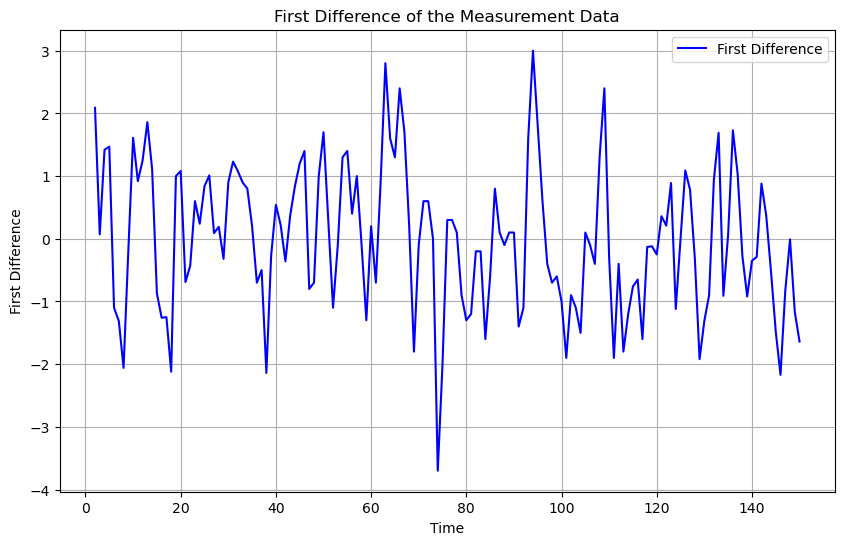

In [17]:
import matplotlib.pyplot as plt

# Compute the first difference of the data
df['FirstDifference'] = df['Measurement'].diff()

# Drop the NaN values caused by differencing
df_diff = df.dropna()

# Plot the first difference
plt.figure(figsize=(10, 6))
plt.plot(df_diff['Time'], df_diff['FirstDifference'], label='First Difference', color='blue')
plt.title('First Difference of the Measurement Data')
plt.xlabel('Time')
plt.ylabel('First Difference')
plt.grid(True)
plt.legend()
plt.show()


c)	Now, develop an MA(1) model on the first difference. Display the model parameters obtained as your output


In [18]:
# Fit the MA(1) model on the first difference
ma_model = ARIMA(df_diff['FirstDifference'], order=(0, 0, 1))
ma_result = ma_model.fit()

# Display the summary of the MA(1) model
ma_result.summary()


/Users/brendonshuke/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brendonshuke/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brendonshuke/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        FirstDifference   No. Observations:                  149
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -202.607
Date:                Fri, 04 Oct 2024   AIC                            411.215
Time:                        22:29:41   BIC                            420.227
Sample:                             0   HQIC                           414.876
                                - 149                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0064      0.137     -0.047      0.962      -0.274       0.261
ma.L1          0.7531      0.061     12.392      0.000       0.634       0.872
sigma2         0.8834      0.110      8.052      0.000       0.668       1.098
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.61   Prob(JB):                         0.58
Heteroskedasticity (H):               0.99   Skew:                            -0.21
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

d)	Based on the model parameters you obtained in (a) and (c), comment on how the two models are related.

*****************
We can clearly see that we get identical results for MA coefficient of 0.7532 and variance = 0.8834. On the first model IMA we have integrated differencing while the second model MA is applied after manually differencing the data which leads to the same result.
******************

3) One of the applications of autocorrelation analysis is to evaluate if a time-series model selected captures all the trends observed in the data, and if the noise remaining is random or not. In this problem, you will perform such an analysis. 
Review the dataset in the file ch1Passengers_HW3.csv which contains data on air passengers. Analyze this file for DOMESTIC passengers and answer the following questions: 
<br>
a.	Extract the data from January 2012 until December 2017 (both inclusive) and plot the time-series. The horizontal axis must be in units of time (e.g. year)


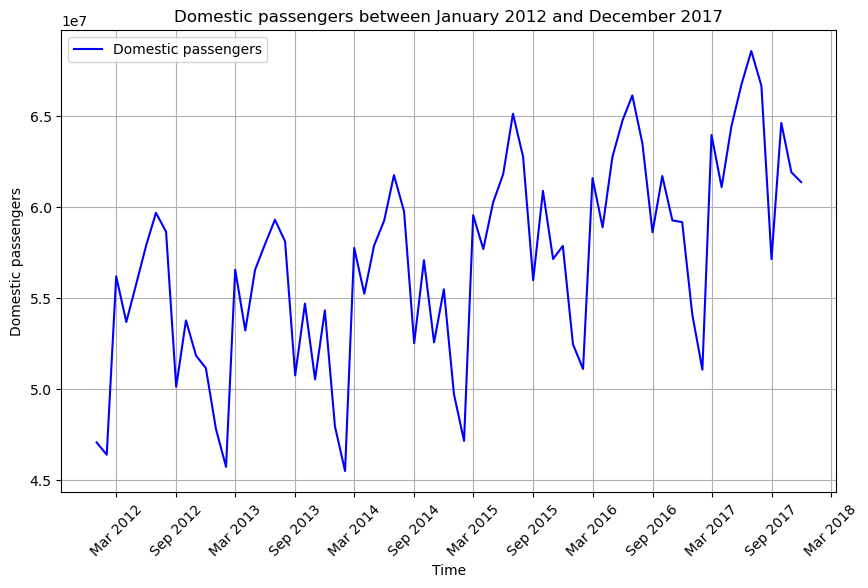

In [19]:
import matplotlib.dates as mdates
passengers_data = pd.read_csv('data/data_3/ch1passengers_HW3.csv')

passengers_data['Date'] = pd.to_datetime(passengers_data['Date'])
passengers_data['DOMESTIC'] = passengers_data['DOMESTIC'].str.replace(',', '').astype(int)
passengers_data['INTERNATIONAL'] = passengers_data['INTERNATIONAL'].str.replace(',', '').astype(int)
passengers_data['TOTAL'] = passengers_data['TOTAL'].str.replace(',', '').astype(int)
# filter rows on the basis of date 
filtered_passengers = passengers_data[(passengers_data['Date'] >= '2012-01-01') & (passengers_data['Date'] <= '2017-12-31')] 

# filtered_passengers.head()


# Plot the first difference
plt.figure(figsize=(10, 6))
plt.plot(filtered_passengers['Date'], filtered_passengers['DOMESTIC'], label='Domestic passengers', color='blue')
plt.title('Domestic passengers between January 2012 and December 2017')
plt.xlabel('Time')
plt.ylabel('Domestic passengers')

# Format x-axis to show both month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 6 months

plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

b.	For the data in part (a) above, perform an additive decomposition. Plot the trend, seasonality, and residual component

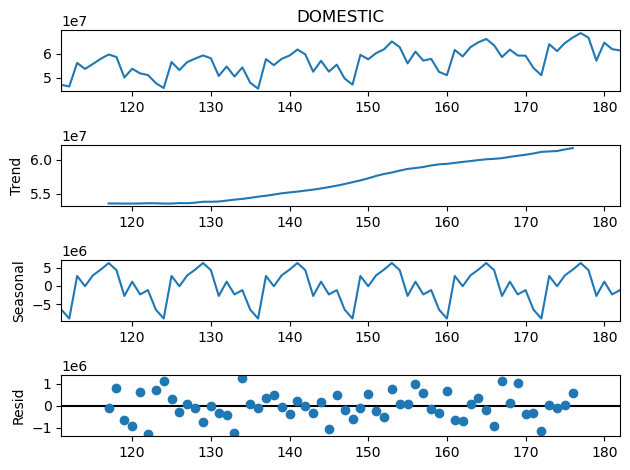

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomposition = seasonal_decompose(filtered_passengers['DOMESTIC'], model='additive', period=12)

# Plot the components
decomposition.plot()
plt.show()


c.	For the residual component obtained in part (b), plot the Auto-correlation function (ACF) [Recommend using the Pandas function: “pandas.plotting.autocorrelation_plot”]

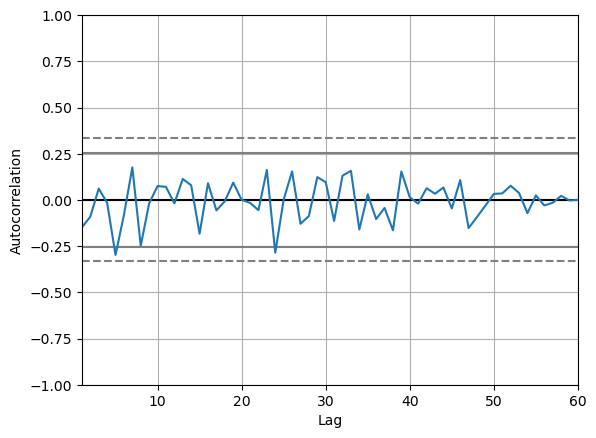

In [21]:
from pandas.plotting import autocorrelation_plot

# Plot the autocorrelation function of the residuals
autocorrelation_plot(decomposition.resid.dropna())
plt.show()


d.	Calculate the width of the confidence interval of the autocorrelation function? Show your work

In [22]:
import math
sample_size = 72
confidence_interval  = 1.96 / math.sqrt(sample_size)
print(f'Confidence interval is: +- ({confidence_interval})')
print('We can confirm this visually in the graph')

Confidence interval is: +- (0.23098821518760554)
We can confirm this visually in the graph


e.	Viewing the ACF plot in (c), state if the residuals are random . Explain how you reached your conclusion
<br>
Answer:
<br>
The residuals are random, because the ACF shows no significant correlation at any lag. All autocorrelation values are within the confidence interval as we can see int the acf plot.